### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [37]:
df=pd.read_csv('AAPL19_22.csv')

In [38]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277523,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464806,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936081,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856091,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539619,164101200


In [39]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
801,2022-03-08,158.820007,162.880005,155.800003,157.440002,157.440002,131148300
802,2022-03-09,161.479996,163.410004,159.410004,162.949997,162.949997,91454900
803,2022-03-10,160.199997,160.389999,155.979996,158.520004,158.520004,105342000
804,2022-03-11,158.929993,159.279999,154.500000,154.729996,154.729996,96836300
805,2022-03-11,158.929993,159.279907,154.500000,154.729996,154.729996,96970102


In [40]:
df1=df.reset_index()['Close']

In [41]:
df1

0       39.480000
1       35.547501
2       37.064999
3       36.982498
4       37.687500
          ...    
801    157.440002
802    162.949997
803    158.520004
804    154.729996
805    154.729996
Name: Close, Length: 806, dtype: float64

In [82]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)


In [87]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')
df2

,Date,Close
0,2019-01-02,39.480000
1,2019-01-03,35.547501
2,2019-01-04,37.064999
3,2019-01-07,36.982498
4,2019-01-08,37.687500
...,...,...
801,2022-03-08,157.440002
802,2022-03-09,162.949997
803,2022-03-10,158.520004
804,2022-03-11,154.729996


In [88]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

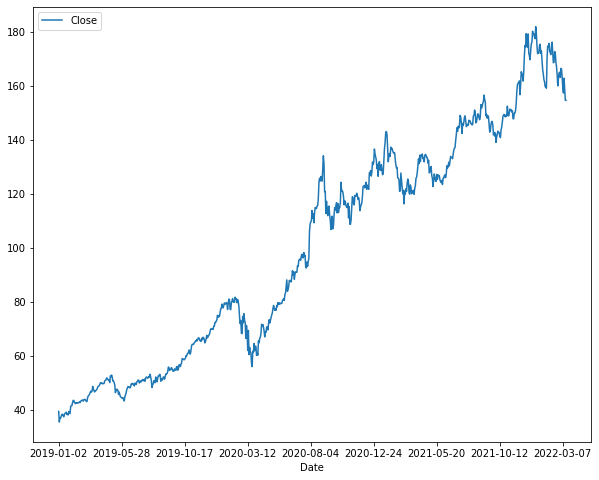

In [95]:
df2.plot(figsize=(10,8))

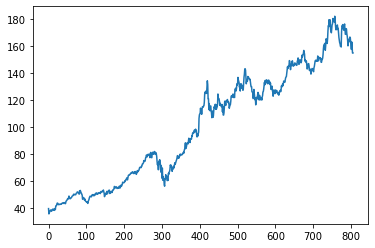

In [42]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [44]:
import numpy as np

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

In [48]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [49]:
training_size,test_size

(564, 242)

In [51]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [52]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
print(X_train.shape), print(y_train.shape)

(463, 100)
(463,)


(None, None)

In [54]:
print(X_test.shape), print(ytest.shape)

(141, 100)
(141,)


(None, None)

In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 5s 259ms/step - loss: 0.0676 - val_loss: 0.0173
Epoch 2/100
8/8 [==============================] - 1s 137ms/step - loss: 0.0116 - val_loss: 0.0873
Epoch 3/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 4/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0039 - val_loss: 0.0243
Epoch 5/100
8/8 [==============================] - 1s 131ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 6/100
8/8 [==============================] - 1s 126ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 7/100
8/8 [==============================] - 1s 125ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 9/100
8/8 [==============================] - 1s 134ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/100
8/8 [==============================] - 1s 122ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 11/

In [61]:
import tensorflow as tf

In [62]:
tf.__version__

'2.8.0'

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

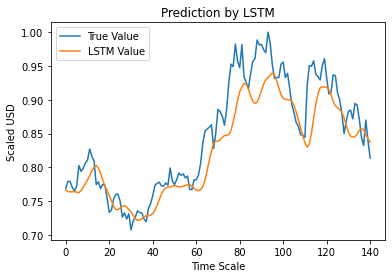

In [64]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(ytest, label='True Value')
plt.plot(test_predict, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [145]:
test_predict.shape

(182, 1)

In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

92.00502714649225

In [67]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

155.80092890018057

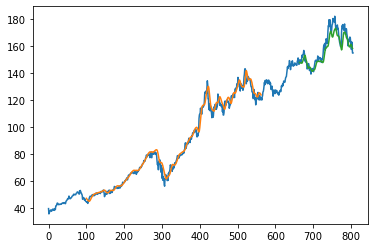

In [68]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [69]:
len(test_data)

242

In [70]:
#100 less than test_data
x_input=test_data[142:].reshape(1,-1)
x_input.shape


(1, 100)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [72]:
temp_input.head()

[0.7763932655687265,
 0.7778953634368675,
 0.772501532030446,
 0.7721601272200103,
 0.7768030086938162,
 0.7735939891887955,
 0.7989929899732557,
 0.7800802709258796,
 0.774345041536709,
 0.7815823687940204,
 0.7916190748465612,
 0.7880004146317487,
 0.7901852197054628,
 0.7844499834886056,
 0.7869762002004419,
 0.7672441860781096,
 0.7669027812676739,
 0.7813775450252813,
 0.781445787752324,
 0.7882734742998436,
 0.8052744479416007,
 0.835179646742872,
 0.8534779013117175,
 0.8566869208167383,
 0.859349718570271,
 0.8629683787850835,
 0.8279423194855609,
 0.8513613321373594,
 0.8859094124124367,
 0.8822907453699376,
 0.8753947205077637,
 0.8622855691642124,
 0.8860459934541332,
 0.9260561410349875,
 0.9526841800194938,
 0.9491337557040374,
 0.9825211360937225,
 0.9571904736239163,
 0.9475634151088539,
 0.9814970240777139,
 0.933430056161682,
 0.9257830745392059,
 0.91629259706584,
 0.9384143356182368,
 0.956507664003045,
 0.9608773833934579,
 0.9885295343939728,
 0.9814286789353732,
 

In [73]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81905115]
101
1 day input [0.77789536 0.77250153 0.77216013 0.77680301 0.77359399 0.79899299
 0.78008027 0.77434504 0.78158237 0.79161907 0.78800041 0.79018522
 0.78444998 0.7869762  0.76724419 0.76690278 0.78137755 0.78144579
 0.78827347 0.80527445 0.83517965 0.8534779  0.85668692 0.85934972
 0.86296838 0.82794232 0.85136133 0.88590941 0.88229075 0.87539472
 0.86228557 0.88604599 0.92605614 0.95268418 0.94913376 0.98252114
 0.95719047 0.94756342 0.98149702 0.93343006 0.92578307 0.9162926
 0.93841434 0.95650766 0.96087738 0.98852953 0.98142868 0.98204325
 0.97398653 0.96968515 1.         0.98422806 0.95159172 0.93165489
 0.93281558 0.93295217 0.95268418 0.95575662 0.93295217 0.93896056
 0.916634   0.89225911 0.88051549 0.86617741 0.86078347 0.84822056
 0.84760608 0.84439706 0.92025267 0.95063585 0.94947516 0.95787318
 0.93779977 0.93431768 0.92933351 0.95097726 0.96087738 0.93247418
 0.90871386 0.91035254 0.93704872 0.93541014 0.91035254 0.89956479
 0.87921831 0.85020064 0.86843055 

In [74]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [75]:
import matplotlib.pyplot as plt

In [76]:
len(df1)

806

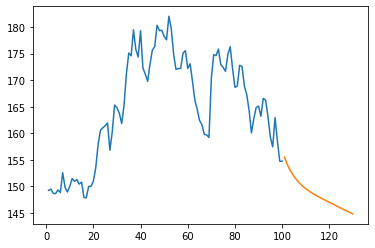

In [77]:
# 100 less than len df1
plt.plot(day_new,scaler.inverse_transform(df1[706:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

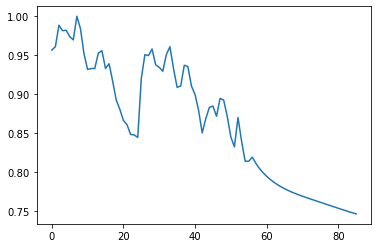

In [78]:
#last 50-80 of len df1
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[750:])

In [79]:
df3=scaler.inverse_transform(df3).tolist()

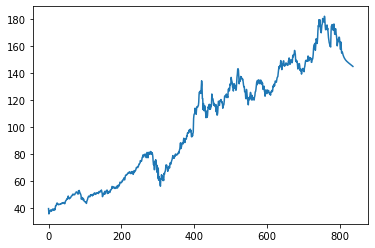

In [80]:
plt.plot(df3)

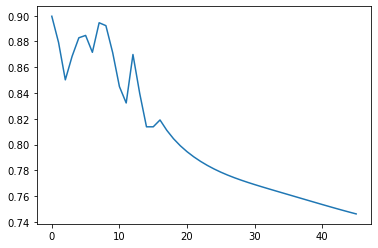

In [81]:
# same as above
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[790:])